In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [12]:
df = pd.read_csv('data4Supervised_withType_Ath.csv')
df = df.fillna(0)
df = df[df['Year']!=2028]

# 创建特征
df['Gold_Ratio'] = df['Past_Gold'] / (df['Past_Total'] + 1e-6)  # 防止除零
df['Silver_Ratio'] = df['Past_Silver'] / (df['Past_Total'] + 1e-6)
df['Bronze_Ratio'] = df['Past_Bronze'] / (df['Past_Total'] + 1e-6)

# 最终特征集
X = df[[
    'Past_Gold', 'Past_Silver', 'Past_Bronze', 'Past_Total',  # 历史表现
    'Gold_Ratio', 'Silver_Ratio', 'Bronze_Ratio',  # 奖牌比例
    'Events_Count', 'Sports_Count',   # 参赛规模
    'isHoster',                     # 主办国效应
    'Country_Type', 'Ath_Score', 'Good_Ath_Ratio',
    'Year'                            # 时间趋势
]]
y = df['Gold'] ##['Total', 'Gold', 'Silver', 'Bronze']

# 目标变量（根据需求切换）
y_total = df['Total']     # 奖牌总数
y_gold = df['Gold']       # 金牌
y_silver = df['Silver']   # 银牌
y_bronze = df['Bronze']   # 铜牌

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

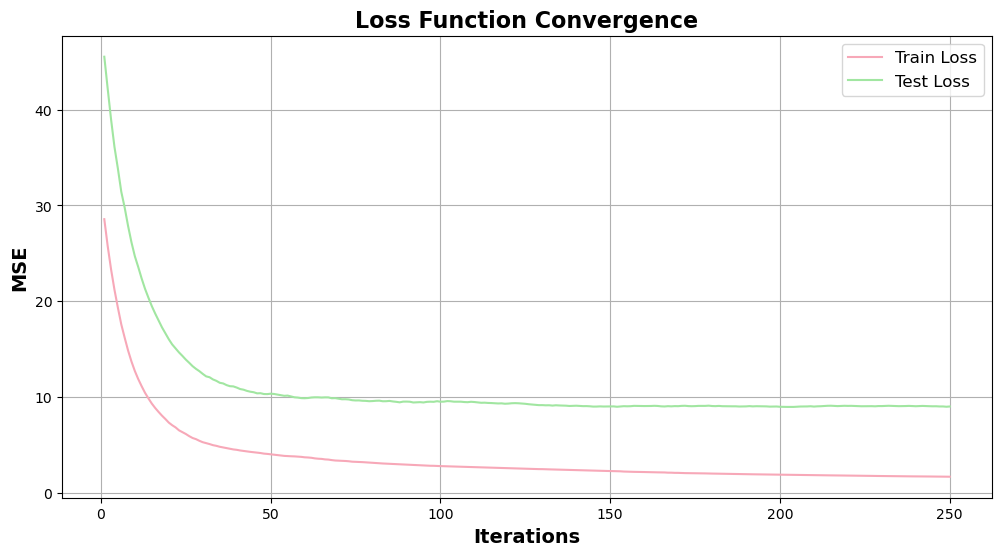

In [15]:
# 创建XGBoost模型
model = GradientBoostingRegressor( random_state=42,
                                   max_depth=2,
                                   min_samples_split=9,
                                   n_estimators=250,
                                   learning_rate=0.072,
                                   min_samples_leaf=3
                                   )

# 训练模型
model.fit(X_train, y_train)

# 使用 staged_predict 方法获取每一步的预测结果
train_loss = []
test_loss = []
for y_pred in model.staged_predict(X_train):
    train_loss.append(mean_squared_error(y_train, y_pred))
for y_pred in model.staged_predict(X_test):
    test_loss.append(mean_squared_error(y_test, y_pred))

# 绘制损失函数收敛图像
plt.figure(figsize=(12, 6))
plt.plot(range(1, model.n_estimators + 1), train_loss, label='Train Loss', color='#F7A8B8')
plt.plot(range(1, model.n_estimators + 1), test_loss, label='Test Loss', color='#A1E6A1')
plt.xlabel('Iterations', fontsize=14, fontweight='bold')
plt.ylabel('MSE', fontsize=14, fontweight='bold')
plt.title('Loss Function Convergence', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()